<a href="https://colab.research.google.com/github/xmsi/tf2_tasks/blob/main/Regression_moore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-04 11:20:28--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0.001s  

2022-07-04 11:20:29 (2.66 MB/s) - ‘moore.csv’ saved [2302/2302]



In [18]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

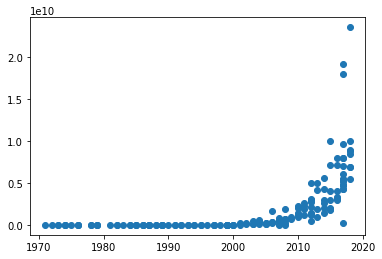

In [19]:
plt.scatter(X, Y)

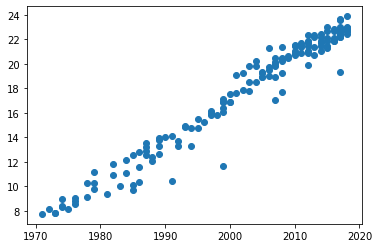

In [20]:
Y = np.log(Y)
plt.scatter(X, Y)

In [24]:
X = X - X.mean()

In [37]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 425.6592 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 346.6964 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 275.3270 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 204.6374 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 150.1662 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 132.5180 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 122.0427 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 110.1769 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 96.3398 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 58.9376 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

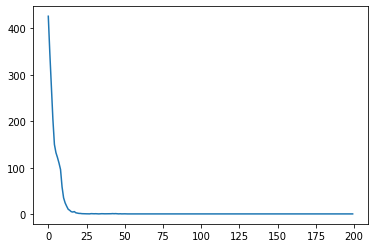

In [38]:
plt.plot(r.history['loss'], label='loss')

In [39]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33559462]], dtype=float32), array([17.770239], dtype=float32)]


In [40]:
a = model.layers[0].get_weights()[0][0,0]

In [41]:
print("Time to double", np.log(2) / a)

Time to double 2.0654299276847325


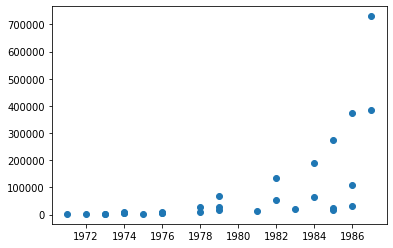